*By Fabian Collas and Ekhine Irurozi*

In [11]:
import os 
os.chdir('/home/fcollas/Documents/mallows_kendall_code/')
import mallows_kendall_comments as mk
import importlib
import numpy as np 
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

## Permutations

**Generation** The most basic function consists of generating permutations. The permutations are coded as vectors of the first $n$ natural numbers (beginning with 0 here in python) where each item appears once and once only.   
Complete permutations can be defined here as ndarrays with dtype int or lists of integers as well.  
They can be defined by hand as follows:

In [3]:
perm1 = [3,1,2,0,4]
perm1

[3, 1, 2, 0, 4]

or similarly: 

In [4]:
perm1 = np.array([3,1,2,0,4])
perm1

array([3, 1, 2, 0, 4])

They can also be randomly generated as follows ($n$ being the length of the permutation): 

In [5]:
n=5
perm2 = np.random.permutation(n)
perm2

array([0, 3, 1, 2, 4])

**Operations** Two permutations can be composed and the result is a permutation 

In [6]:
mk.compose(perm1, perm2)

array([3, 0, 1, 2, 4])

The inverse of a permutation can also be obtained with:

In [7]:
mk.inverse(perm1)

array([3, 1, 2, 0, 4])

## Distances

The Kendall's-$\tau$ distance $d_k(\sigma\pi^{-1})$ counts the number of pairwise disagreements beetween $\sigma$ and $\pi$, i.e., the number of pairs of positions in which the items are in a particular order in $\sigma$, and the reverse order in $\pi$. The Kendall's-$\tau$ distance between two permutations can be computed as follows: 

In [8]:
mk.kendallTau(perm1, perm2)

5

If only one permutation is given in input, it will be assumed that the second permutation is the identity permutation.

In [9]:
mk.kendallTau(perm1)

5

The maximum value of the kendall's-$\tau$ distance between two permutation of length $n$ is $\frac{n(n-1)}{2}$. It is possible to get this value using the following function: 

In [10]:
mk.max_dist(n)

10

## Mallows Models (MM) and Generalized Mallows Models (GMM) for permutations

## Mallows Models

### A FINIR 
MALLOWS MODEL PRESENTATION ...  
It is possible to sample the Mallows Model, given the dispersion parameter of the model. The sampling function always generates the samples considering $\sigma_0 = e$ the identity permutation. In order to change the central permutation it is then necessary to compute each permutation of the sample with a chosen permutation $\sigma_0$ different from the identity.

In [27]:
m = 6000
n = 5
theta_MM = 0.1
identity = np.array(range(n))
sample_MM = np.array(mk.samplingMM(m,n,theta_MM))

Then Borda algorithm allows to approximate the central permutation:  

In [28]:
mk.borda(sample_MM)

array([0, 1, 2, 3, 4])

The probability of each permutation from a sample is computed according to formula: 
$$p(\sigma)=\dfrac{exp(-\theta d_k(\sigma \sigma_0^{-1}))}{\psi(\theta)}$$ 
with $\psi(\theta) =  \prod\limits_{\substack{j=1}}^{n-1} \frac{1-exp(-\theta(n-j+1))}{1 - exp(-\theta)}$

In [29]:
mk.prob_sample(sample_MM, identity, theta_MM)

array([0.00816179, 0.00668231, 0.00902018, ..., 0.0073851 , 0.00996884,
       0.01101727])

The expected value of Kendaall's-$\tau$ distance under the MM is given by: 
$$E_{\theta}[d_k] = \frac{n \, exp(-\theta)}{1 - exp(-\theta)} - \sum\limits_{j=1}^n\frac{j \, exp(-j \theta)}{1 - exp(-j \theta)}$$

In [39]:
expected_dist = mk.expected_dist_MM(n, theta_MM)
expected_dist

4.584679366752994

The average distance of the permutations of the sample to the consensus permutation : $$\bar{d} = \frac{1}{m}\sum_{i=1}^md_k(\sigma_i\sigma_0^{-1})$$
is computed as follow: 

In [63]:
avg_dist = np.mean(np.array([mk.kendallTau(identity, perm) for perm in sample_MM]))
avg_dist

4.586166666666666

Theoritically the Maximum Likelihood Estimator (MLE) of $\theta$ verifies $E_\theta[d_k] = \bar{d}$. First it can be verified that the values computed previously are consistent with this result: 

In [59]:
print(expected_dist - avg_dist)

-0.0014872999136725795


Then using $E_\theta[d_k] = \bar{d}$, the MLE of $\theta$ is estimated by the fitting function for MM: `fit_MM` (which returns the value of $\phi$ dispersion parameter). The same function also returns the estimator for the consensus permutation, computed according to Borda's algorithm: 

In [34]:
sigma_borda, phi_MM_MLE = mk.fit_MM(sampleMM)
print(sigma_borda)
print(phi_MM_MLE)

[0 1 2 3 4]
0.9133457420575463


In order to have $\theta$ rather than $\phi$ for the dispersion parmeter MLE, it can be computed as follows: 

In [36]:
theta_MM_MLE = mk.phi2theta(phi_MM_MLE)
theta_MM_MLE

0.09064078216602862

In [38]:
expected_dist_theta_MM_MLE = mk.expected_dist_MM(n, theta_MM_MLE)
expected_dist_theta_MM_MLE

4.623333333333356

The estimation of parameters $\sigma_0$ and $\theta$ is evaluated with the relative error formula:
$$\dfrac{\mathcal{\bar{L}} - \mathcal{L}_0}{m\mathcal{\bar{L}}}$$
where $\mathcal{\bar{L}}$ is the log-likehood given by the estimated parameters and $\mathcal{L}_0$ is the likelihood given by the value of the parameters used to generate the sample.  
Using mallows_kendall package it can be computed as follows:

In [36]:
likelihood_bar = mk.likelihood_mm(sample, fit[0], fit[1])
likelihood_0 = mk.likelihood_mm(sample, identity, 0.1)

In [38]:
relative_error = (likelihood_bar - likelihood_0)/(m*likelihood_bar)

In [46]:
relative_error

0.0004518028069562388

## where to insert VARIANCE ??

In [41]:
mk.variance_dist_MM(n, theta_MM)

4.126419794736876

In [66]:
variance = np.mean(np.array([pow(mk.kendallTau(identity, perm) - avg_dist, 2) for perm in sample_MM]))
variance

4.153908638888889

## Generalized Mallows Models 

### A FINIR 

It is also possible to sample the Generalized Mallows Models (GMM). In the package it is quite similar as for the classical Mallows Models, only that the dispersion parameter will be given as a list. 

In [46]:
m = 4000
n = 5
theta_GMM = [0.1,0.2,0.6,0.3]
identity = np.array(range(n))
sample_GMM = np.array(mk.samplingGMM(m,theta_GMM))

In the GMM the expected value of each $V_j(\sigma)$ is used to estimate the parameters. The formula is the following:
$$ E_\theta[V_j] = \frac{exp(-\theta_j)}{1 - exp(-\theta_j)} - \frac{(n-j+1)exp(-\theta_j(n-j+1))}{1 - exp(-\theta_j(n-j+1))}, \;\forall j \in \{1, \dotsc, n-1\}  $$
And the values are computed as follows:

In [53]:
expected_V_GMM = mk.expected_V(n, theta_GMM)
print(expected_V_GMM)

[1.80086153 1.25279068 0.62226834 0.42555748]


The average decomposition vector is determined with the formula: $$ \bar{V_j} = \frac{1}{m}\sum\limits_{i=1}^m V_j(\sigma_i\sigma_0^{-1}), \;\forall j \in \{1, \dotsc, n-1\}$$
And is computed as follows in the package:

In [57]:
v_avg = mk.v_avg(sample_GMM) 
print(v_avg)

[1.812   1.25825 0.609   0.4175 ]


In [58]:
expected_V_GMM - v_avg

array([-0.01113847, -0.00545932,  0.01326834,  0.00805748])

As for the MM the MLE for the dispersion parameters $\theta_j$ are obtained by approximition of the solution of equations: $\bar{V_j} = E_\theta[V_j]$. 

In [50]:
sigma_borda, theta_GMM_MLE = mk.fit_GMM(sample_GMM)
print(sigma_borda)
print(theta_GMM_MLE)

[2 1 0 3 4]
[0.094362173973987, 0.19548617251197292, 0.6238240981340246, 0.33304464114894267]


Variance

In [68]:
mk.variance_V(n, theta_GMM)

array([1.97425609, 1.20855956, 0.56066479, 0.24445831])

In [70]:
variances_sample_GMM = [np.mean([pow(mk.ranking2v(sigma)[j] - v_avg[j], 2) for sigma in sample_GMM]) for j in range(n-1)]
variances_sample_GMM

[2.058656, 1.2040569375, 0.5391189999999999, 0.24319374999999996]

# Partial permutations 

Finally it is possible to work with partial permutations, where there are elements for which the ordering is not defined.   
*EXPLAIN* difference between ordering (= top-k list) and ranking

An ordering $\alpha \in A$ can be sampled as follows: 

In [8]:
m = 1
n = 10 
k = 3
phi = 0.9 
sigma = np.random.permutation(n)
alpha = mk.samplingMM(m=m,n=n,phi=phi,k=k) [0]
alpha

array([ 3.,  5.,  4., nan, nan, nan, nan, nan, nan, nan])

It is possible to obtain the ranking $\beta \in B$ corresponding to a given ordering with the following function:

In [13]:
beta = mk.alpha2beta(alpha,k)
beta

array([nan, nan, nan,  0.,  2.,  1., nan, nan, nan, nan])

For partial permutations, special distances are used. Here different alternatives to Kendall's-$\tau$ are used for ordering and ranking. It is defined such that $d(\alpha) = d(\beta) = d(\sigma, \beta\sigma)$ given $\sigma$ any full permutation. However $d(\sigma, \alpha\sigma)$ cannot be verified.

In [19]:
print("d(alpha) = d(beta) ?", mk.distAlpha(alpha, k)== mk.distBeta(beta))
print("d(beta) = d(sigma, beta sigma) ?",mk.distBeta(beta)== mk.distBeta(mk.compose(beta, sigma), sigma))

d(alpha) = d(beta) ? True
d(beta) = d(sigma, beta sigma) ? True


The expected distance and the variance can be checked ...

variance, model and sample 19.246666483533858 19.24938396


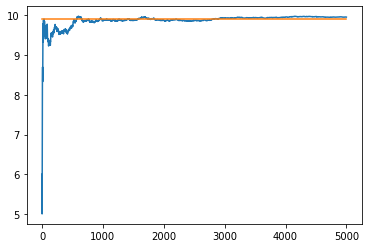

In [21]:
dists = []
mm=5000
for s in range(mm):
    alpha = mk.samplingMM(m=1,n=n,phi=phi,k=k) [0]
    dists.append(mk.distAlpha(alpha, k))
means = np.cumsum(dists) / np.arange(1, mm + 1)
expected_dist = np.sum(mk.expected_V(n,theta=None, phi=phi,k=k))
plt.plot(means)
plt.plot([0,mm],[expected_dist, expected_dist])
print("variance, model and sample",np.sum(mk.variance_V(n,theta=None, phi=phi,k=k)), np.std(dists)**2)

In [17]:
from imp import reload
reload(mk)

<module 'mallows_kendall_comments' from '/home/fcollas/Documents/mallows_kendall_code/mallows_kendall_comments.py'>